In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def line_creator(a, b):
    return lambda x: a*x + b
    


In [5]:
linea_nueva = line_creator(1, 0)
linea_nueva(6)

6

In [6]:
linea_nueva(0)

0

In [7]:
def fm1(f):
    return f(4) +1


In [8]:
fm1(linea_nueva)

5

In [9]:
df = pd.read_csv('methanol-water.csv')
df

,x,y
0,0.02,0.013
1,0.06,0.300
2,0.10,0.420
3,0.20,0.570
4,0.30,0.660
5,0.40,0.720
6,0.50,0.780
7,0.60,0.820
8,0.70,0.870
9,0.80,0.910


In [10]:
x = df['x'].values
y = df['y'].values

In [11]:
y

array([0.013, 0.3  , 0.42 , 0.57 , 0.66 , 0.72 , 0.78 , 0.82 , 0.87 ,
       0.91 , 0.95 , 0.98 ])

In [12]:
def create_feed_line(q, xf):
    return lambda x: q*x/(q-1) - xf/(q-1)

In [13]:
feed = create_feed_line(0.5, 0.5)
x0f = np.linspace(0,1,200)
y0f = [feed(x) for x in np.linspace(0,1,200)]

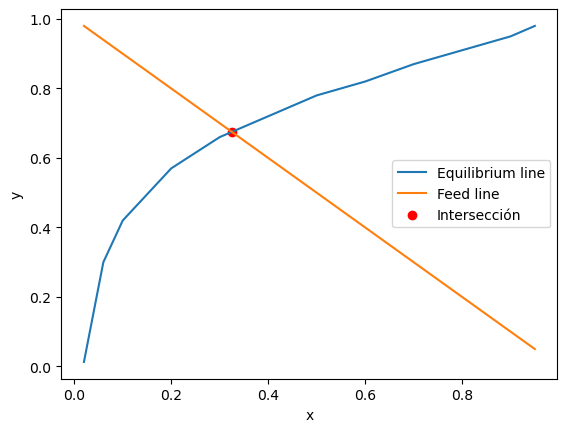

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

def create_feed_line(q, xf):
    return lambda x: q*x/(q-1) - xf/(q-1)

def find_intersection(df, q, xf, epsilon=1e-5):
    feed = create_feed_line(q, xf)
    x_values = df['x'].values
    y_values = df['y'].values

    def difference_function(x):
        return y_values - feed(x)

    # Verifica el cambio de signo para encontrar intervalos que contienen la intersección
    sign_changes = np.where(np.diff(np.sign(difference_function(x_values))))[0]

    if len(sign_changes) == 0:
        return None  # No hay cambio de signo, no hay intersección

    intersections = []

    # Utiliza interpolación para encontrar la intersección en cada subintervalo
    for i in sign_changes:
        x_interval = x_values[i:i+2]
        y_interval = y_values[i:i+2]
        interpolator = interp1d(x_interval, y_interval, kind='linear', fill_value="extrapolate")
        intersection = fsolve(lambda x: interpolator(x) - feed(x), np.mean(x_interval))
        intersections.extend(intersection)

    return intersections

# Ejemplo de uso
q_guess = 0.5
xf_guess = 0.5
intersections = find_intersection(df, q_guess, xf_guess)

# Gráfico
x_values = df['x'].values
y_values = df['y'].values

feed = create_feed_line(q_guess, xf_guess)
y_feed = feed(x_values)

plt.plot(x_values, y_values, label='Equilibrium line')
plt.plot(x_values, y_feed, label='Feed line')
plt.scatter(intersections, feed(np.array(intersections)), color='red', label='Intersección')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [15]:
# feed = create_feed_line(0.5, 0.5)
# x
# y
eq_x = x
eq_y = y

In [16]:
class Point:
    def __init__(self, idx, x, y):
        self.idx = idx
        self.x = x[idx]
        self.y = y[idx]
        self.x_data = x
        self.y_data = y

    def change(self, idx):
        self.x = self.x_data[idx]
        self.y = x_data.y_data[idx]

In [17]:
a = Point(0, eq_x, eq_y)
b = Point(len(eq_x)-1, eq_x, eq_y)

fay = feed(a.x)
fby = feed(b.x)
print(a.y, b.y)
print(fay, fby)

0.013 0.98
0.98 0.050000000000000044


In [22]:
def intersection(a, b, feed, eq_x , eq_y ):
    print(a.idx, b.idx)
    # if a.idx + 1 == b.idx:
    #     return a, b
    
    # n = len(eq_x[a.idx:b.idx])
    m = (a.idx+b.idx)//2
    print(m)
    fay = feed(a.x)
    fby = feed(b.x)
    
    pm = Point(m, eq_x , eq_y)
    
    fmy = feed(pm.x)
    
    if (a.y-fay)*(pm.y-fmy) < 0:
        b = pm
    else:
        a = pm

    return a, b

aa, bb = intersection(a, b, feed, eq_x , eq_x )
aaa, bbb = intersection(aa, bb, feed, eq_x , eq_x )
a3, b3 = intersection(aaa, bbb, feed, eq_x , eq_x )
a4, b4 = intersection(a3, b3, feed, eq_x, eq_x)
a5, b5 = intersection(a4, b4, feed, eq_x, eq_x)
a6, b6 = intersection(a5, b5, feed, eq_x, eq_x)

# print(aa.x, bb.x)
# print(aaa.x, bbb.x)
        
    
    

0 11
5
5 11
8
5 8
6
6 8
7
7 8
7
7 8
7


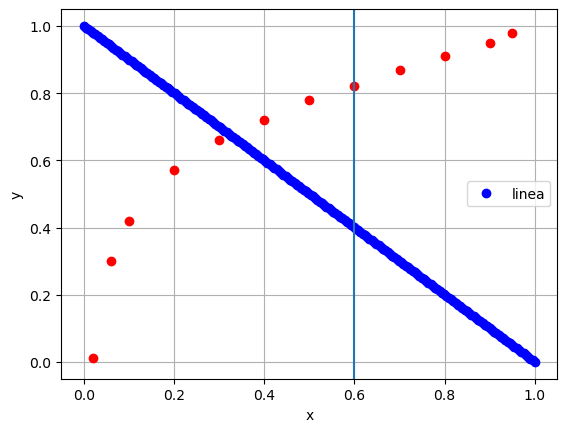

In [20]:
plt.plot(x, y, 'ro')
plt.plot(x0f, y0f, 'bo', label = 'linea')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x[7])

plt.legend()
plt.grid(True)

In [30]:
def factorial(n):
    if n < 2:
        return n
    return factorial(n-1) * n

factorial(5)

120